In [1]:
import numpy as np 
import matplotlib.pyplot as plt

(24001,)


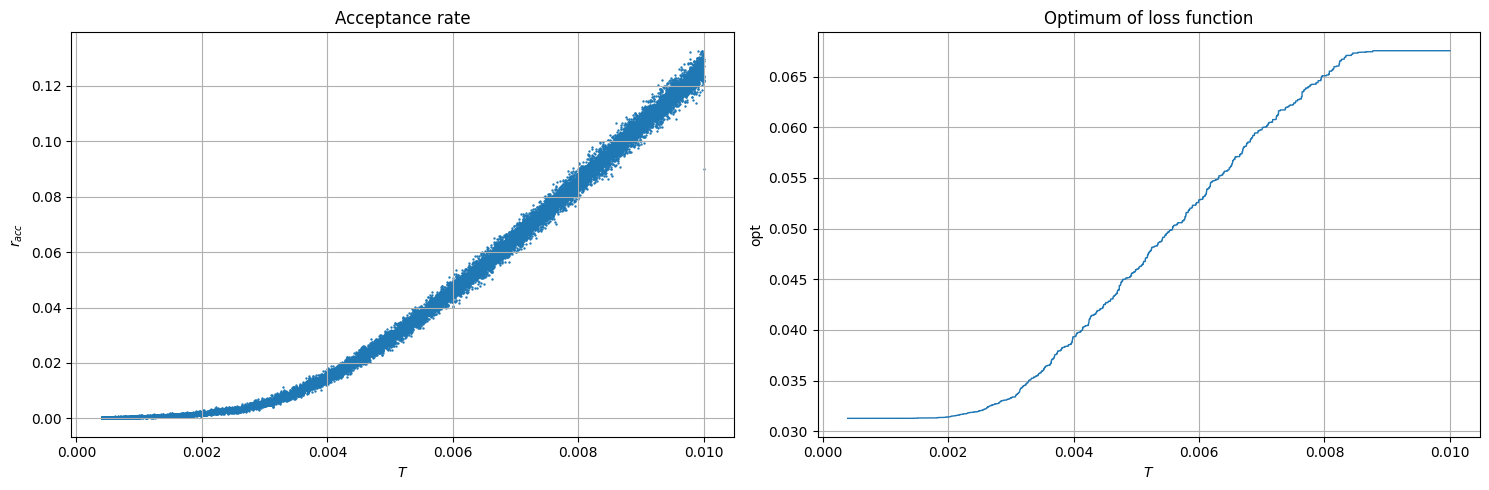

In [2]:
Nbars=[100]
n_cells=40*40
V=25
V_cell=(1/8)**2
N=32
kappa=30/32
fig, axs = plt.subplots(1, 2, figsize=(15, 5),dpi=100)
axs=axs.flatten()
for i in range(len(axs)):
    axs[i].grid()

axs[0].set_title("Acceptance rate")
axs[1].set_title("Optimum of loss function")


axs[0].set_xlabel('$T$')
axs[1].set_xlabel('$T$')
axs[0].set_ylabel('$r_{acc}$')
axs[1].set_ylabel('opt')
#plt.yscale('log')
for Nbar in Nbars:
    rho0=N*Nbar
    rhoc=rho0*V_cell #beads per cell
    var_phi=1/(rho0*kappa*(1/8)**2) 
    T=np.loadtxt(f"Nbar{Nbar}/T.csv")
    n_T=len(T)#number of temperatures
    acc_rate=np.loadtxt(f"Nbar{Nbar}/acc_rate.csv")
    acc_rate=acc_rate.reshape(int(acc_rate.shape[0]/n_T),n_T).mean(axis=0)
    opt=np.loadtxt(f"Nbar{Nbar}/opt.csv")/(2*n_cells)
    opt=opt.reshape(int(opt.shape[0]/n_T),n_T).mean(axis=0)
    print(opt.shape)
    axs[0].scatter(T,acc_rate,s=0.5,label=r"$\rho_{cell}=$"+f"{rhoc}")
    # for i in range(len(opt)):
    #     axs[1].plot(T,opt[i]/var_phi,lw=1)
    axs[1].plot(T,opt/var_phi,lw=1)
plt.tight_layout()
plt.savefig("accrate_1.pdf")
